# Data Wrangling 

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import requests
import os

## Gathering Data for Project

### 1.Opening a file in hand

In [2]:
# opening the file given as is
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. File downloaded from Internet programmatically

In [3]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# Method to get our request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
# To save the file in our folder
with open (os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)
# To list the contents of the folder
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
# Opening the tab separated file
df_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep = ('\t'))
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3.Source : API(Twitter)

After setting twitter account and Twitter App, we will get the api object.

In [8]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
# Api object will be created to get twitter Data
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

In [9]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
tweet_ids = list(df_archive.tweet_id)  # getting the list of twitter ids

In [10]:
# Tweet data is gathered by using Ids in the twitter archive Data farme(df_archive)
with open('tweet_json.txt', 'a', encoding='UTF-8') as file:
        for tweet_id in tweet_ids:
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')._json
                json.dump(tweet, file)
                file.write('\n')
            except:
                continue
# Read text file line by line to create dataframe
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
twitter_api = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

twitter_api.head()                

In [11]:
# Reduce df_api to the necessary columns
df = df_api[['id', 'retweet_count', 'favorite_count']]

# Save Dataframe for Visual Assessment
df_api.to_csv("tweet_json.csv")

# Reading the file stored from json data
df_json = pd.read_csv('tweet_json.csv',index_col = [0])
df_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8398,38294
1,892177421306343426,6196,32818
2,891815181378084864,4100,24714
3,891689557279858688,8528,41623
4,891327558926688256,9244,39789


In [12]:
df_json.shape

(2340, 3)

## Assess

Assessing Data for this Project
Assess them visually and programmatically for quality and tidiness issues. Document at least eight (8) quality issues and two (2) tidiness issues.

You do not need to gather the tweets beyond August 1st, 2017

Assessment has two Types
- Visual Assessment
- Programmatic Assessment

The three Dataframes will be accessed Visually first.
For this purpose I Used Excel Sheets.
In the detect phase I noticed the Quality and Tidiness of Data
Next in the Document Phase, I will document the Issues.


###### Quality Issues

- Datatype of 'Timestamp' and 'retweeted_status_timestamp' is object rather than Datetime in Archive Data.

- Datatype of the tweet_id is integer, it should be string as it is charcteristic id.

- Missing data of 5 columns of more than 90 percent of the Archive Data.

- Inconsistent data of 'Name' column,containing 'a','an','the' as name of the dogs.

- 'None' is used in the place of NAN in dog stages(4) column.

- Retweet rows should be dropped as we are interested only in the original tweets.

- Predictions Dataframe has Tweet Id column as integer, so it should be String

- Img_num column is not giving any valuable information, so can be dropped

- 13 columns in the dataframe received through twitter Api have data less than 90 percent.

- Adjusting Dataypes of the date column in the json data file.

- Renaming the 'id' column of the json file to tweet_id so that they can be merged later on.

###### Tidyness Issues

- Dog Stages should be a column, rather than four columns.

- Timestamp should be separated as date and time column separately.

- Retweet count and favorite count should be a part of the Archive dataframe.

In [13]:
# Display a basic summary of the DataFrame using .info
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Display a basic summary of the DataFrame using .info
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# Display a basic summary of the DataFrame using .info
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 73.1 KB


In [17]:
# Display the first five rows of the DataFrame using .head
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
# Display the first five rows of the DataFrame using .head
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# Display the first five rows of the DataFrame using .head
df_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8398,38294
1,892177421306343426,6196,32818
2,891815181378084864,4100,24714
3,891689557279858688,8528,41623
4,891327558926688256,9244,39789


In [20]:
# Display the entry counts for the Name column using .value_counts
df_archive['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Toby          7
an            7
Bailey        7
Daisy         7
Buddy         7
Leo           6
Jack          6
Jax           6
Scout         6
Stanley       6
Milo          6
Oscar         6
Dave          6
Rusty         6
Bella         6
Koda          6
Finn          5
           ... 
Mary          1
Iggy          1
Coleman       1
Shiloh        1
JD            1
Adele         1
Glacier       1
Tuck          1
Birf          1
Skittle       1
Kaiya         1
Newt          1
Orion         1
Travis        1
Barclay       1
Theo          1
Andy          1
Patch         1
Laela         1
Rontu         1
Tango         1
Cheesy        1
Tino          1
Sobe          1
Shelby        1
Jett          1
Hermione      1
Cora          1
Shadoe        1
Kaia          1
Name: name, Length: 957,

## Clean


Cleaning includes merging individual pieces of data according to the rules of tidy data.

In [21]:
# Copy the dataframes for cleaning purpose and saving the original one untouched
archive_clean = df_archive.copy()
predictions_clean = df_predictions.copy()
json_clean = df_json.copy()

### DataType

#### `Archive`: Datatype of Timestamp column

**Define**

Changing the datatype of the Timestamp column in the archive_clean column

**Code**

In [22]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

**Test**

In [23]:
archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### `Archive`: Datatype of retweeted_status_timestamp column

**Define**

Changing the datatype of the Timestamp column in the archive_clean column

**Code**

In [24]:
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

**Test**

In [25]:
archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### `Archive`: Datatype of tweet_id column

**Define**

Changing the datatype of the tweet_id column in the archive_clean column to the string datatype

**Code**

In [26]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

**Test**

In [27]:
archive_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Drop The retweet rows

**Define**

Dropping the rows with the retweet status, as they are retweet rather than original ones

**Code**

In [28]:
# Finding out the Number of rows having retweet Status
archive_clean[archive_clean['retweeted_status_timestamp'].notnull() == True].shape

(181, 17)

In [29]:
#Dropping the rows with retweet status
archive_clean = archive_clean.drop(archive_clean[archive_clean['retweeted_status_id'].notnull()== True].index)

**Test**

In [30]:
archive_clean[archive_clean['retweeted_status_timestamp'].notnull() == True].shape
# Hence no rows with retweet status

(0, 17)

### Missing data

#### `Archive`:Missing Data of 5 columns

**Define**

dropping the columns with missing values in Archive Dataframe

**Code**

In [31]:
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp','retweeted_status_user_id','retweeted_status_id'], axis=1)

**Test**

In [32]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
572,801285448605831168,2016-11-23 04:45:12,"<a href=""http://twitter.com/download/iphone"" r...",oh h*ck 10/10 https://t.co/bC69RrW559,https://twitter.com/dog_rates/status/801285448...,10,10,None,None,None,None,None
613,796865951799083009,2016-11-11 00:03:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He's just checking on you. Nifty ...,https://twitter.com/dog_rates/status/796865951...,12,10,Tyr,None,None,None,None
1488,692919143163629568,2016-01-29 03:56:12,"<a href=""http://twitter.com/download/iphone"" r...",Please only send in dogs. Don't submit other t...,https://twitter.com/dog_rates/status/692919143...,9,10,None,None,None,None,None
156,861383897657036800,2017-05-08 00:54:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Hobbes. He's never seen bubbles before...,https://twitter.com/dog_rates/status/861383897...,13,10,Hobbes,None,None,None,None
208,852311364735569921,2017-04-13 00:03:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Wiggles. She would like you to spot he...,https://twitter.com/dog_rates/status/852311364...,13,10,Wiggles,None,None,None,None


**Define**

Replacing the 'None' to the NAN in the doggo, floofer, puppo and pupper column

**Code**

In [33]:
archive_clean = archive_clean.replace('None', np.nan)

**Test**

In [34]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
945,752660715232722944,2016-07-12 00:27:52,"<a href=""http://twitter.com/download/iphone"" r...",Hooman used Pokeball\n*wiggle*\n*wiggle*\nDogg...,https://twitter.com/dog_rates/status/752660715...,10,10,NaN,doggo,NaN,NaN,NaN
2173,669324657376567296,2015-11-25 01:20:08,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ralf. He's a miniature Buick DiCaprio. Ca...,https://twitter.com/dog_rates/status/669324657...,11,10,Ralf,NaN,NaN,NaN,NaN
1915,674318007229923329,2015-12-08 20:01:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's in quite the predicament....,https://twitter.com/dog_rates/status/674318007...,8,10,Lennon,NaN,NaN,pupper,NaN
1370,702321140488925184,2016-02-24 02:36:23,"<a href=""http://twitter.com/download/iphone"" r...",Please enjoy this picture as much as I did. 12...,https://twitter.com/dog_rates/status/702321140...,12,10,NaN,NaN,NaN,NaN,NaN
2076,670838202509447168,2015-11-29 05:34:25,"<a href=""http://twitter.com/download/iphone"" r...",Pink dogs here. Unreasonably long necks. Left ...,https://twitter.com/dog_rates/status/670838202...,4,10,NaN,NaN,NaN,NaN,NaN


### Drop The Rows without images

**Define**
drop the rows with no images( expanded_urls)

**Code**

In [35]:
# Finding the number of rows with Null expanded Urls
archive_clean[archive_clean['expanded_urls'].isnull()].shape

(58, 12)

In [36]:
archive_clean.dropna(subset = ['expanded_urls'],inplace = True)

**Test**

In [37]:
archive_clean[archive_clean['expanded_urls'].isnull()].shape

(0, 12)

**Define**

Inconsistent
data of 'Name' column,containing 'a','an','the' as name of the dogs.
We will replace those names with Nan values.

**Code**

In [38]:
archive_clean['name'].replace(['a','an','the','light','life','by','actually','just','getting','infuriating','old','all','this','mad','very','not','one','my','quite','such','None'], np.nan,inplace = True)

**Test**

In [39]:
sum(archive_clean.name.str.islower())

nan

### DataType

#### `Predictions Dataframe`: Datatype of Tweet Id column

**Define**

Changing the datatype of the Tweet Id column in the predictions_clean column

**Code**

In [40]:
predictions_clean['tweet_id'] = predictions_clean['tweet_id'].astype(str)

**Test**

In [41]:
predictions_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

**Define**

Img_num column can be dropped by Drp method

**Code**

In [42]:
predictions_clean = predictions_clean.drop(['img_num'], axis=1)

**Test**

In [49]:
predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Renaming Id column

**Define**

Id column is renamed as tweet_id , so that they can be merged Later on

**Code**

In [50]:
json_clean.rename(columns = {'id' : 'tweet_id'},inplace =True)

**Test**

In [51]:
json_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### DataType

#### `Json Dataframe`: Datatype of  Id column

**Define**

changing the data type of the id column to the string type

**Code**

In [52]:
json_clean['tweet_id'] = json_clean['tweet_id'].astype(str)

**Test**

In [53]:
json_clean.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object




- Retweet count and favorite count should be a part of the Archive dataframe.

**Define**

Merging the two Dataframes as they should be in a Single DataFrame

**Code**

In [54]:
master_clean = pd.merge(left=json_clean,right=archive_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

**Test**

In [55]:
master_clean.sample(5)

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1804,671544874165002241,1085,2032,2015-12-01 04:22:29,"<a href=""http://twitter.com/download/iphone"" r...",Interesting dog here. Very large. Purple. Mani...,https://twitter.com/dog_rates/status/671544874...,6,10,NaN,NaN,NaN,NaN,NaN
155,855857698524602368,2196,12101,2017-04-22 18:55:51,"<a href=""http://twitter.com/download/iphone"" r...","HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",https://twitter.com/perfy/status/8558573181681...,13,10,NaN,NaN,NaN,NaN,NaN
1933,669351434509529089,194,450,2015-11-25 03:06:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,NaN,NaN,NaN,NaN
1626,675517828909424640,486,1354,2015-12-12 03:29:35,"<a href=""http://twitter.com/download/iphone"" r...",12/10 stay woke https://t.co/XDiQw4Akiw,https://twitter.com/dog_rates/status/675517828...,12,10,NaN,NaN,NaN,NaN,NaN
805,747103485104099331,4318,10145,2016-06-26 16:25:26,"<a href=""http://twitter.com/download/iphone"" r...","Guys... I said DOGS with ""shark qualities"" or ...",https://twitter.com/dog_rates/status/747103485...,11,10,NaN,NaN,NaN,NaN,NaN


#### A single variable of Dog Stages shold be in a single column

**Define**

Removing last four separate columns used for the same variable

**Code**

In [56]:
# Columns are specified which are to be kept and which are to be removed
remove_cols = ['doggo', 'floofer', 'pupper', 'puppo']
remain_cols= ['tweet_id', 'timestamp','retweet_count', 'favorite_count', 'source', 'text','expanded_urls', 'rating_numerator',
       'rating_denominator', 'name']

master_clean = pd.melt(master_clean, id_vars = remain_cols, value_vars = remove_cols, 
                         var_name = 'stage', value_name = 'dog_stages')
# Delete column 'stages'
master_clean = master_clean.drop('stage', 1)
# Delete duplicated tweet_id
master_clean = master_clean.drop_duplicates()

**Test**

In [57]:
master_clean.head()

,tweet_id,timestamp,retweet_count,favorite_count,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56,8398,38294,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,6196,32818,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,4100,24714,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,8528,41623,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,9244,39789,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Timestamp should be separated as date and time column separately.

**Define**

Timestamp Column should be separated as two columns separately for Date And TIme

**Code**

In [58]:
# Making A separate column for Date
master_clean['date'] = master_clean.timestamp.dt.date
# MAking  A separate column for Time
master_clean['time'] = master_clean.timestamp.dt.time
# Dropping the Extra column now i-e timestampcolumn
master_clean.drop('timestamp', axis=1, inplace = True)

**Test**

In [59]:
master_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'source', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stages', 'date', 'time'],
      dtype='object')

#### Merging the Predictions Data Frame and the MAster clean Data frame

**Define**

Merging the Two Data Frames to give them a final shape

**Code**

In [60]:
twitter_archive_master = pd.merge(left=master_clean,right=predictions_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

**Test**

In [61]:
twitter_archive_master.head()

,tweet_id,retweet_count,favorite_count,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,8398,38294,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,6196,32818,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,4100,24714,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,8528,41623,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,9244,39789,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [62]:
twitter_archive_master.shape

(2308, 22)

### Store The dataframe

In [63]:
# Store the clean DataFrame in a CSV file named twitter_archive_master.csv

twitter_archive_master.to_csv('twitter_archive_master.csv')

### Analysis and Visualization


In [1]:
# Importing necesary library for visualizations
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [29]:
#Loading the dataframe 
df =pd.read_csv('twitter_archive_master.csv')

In [30]:
# Changing the data type of Time and date column to datetime
df.date = pd.to_datetime(df.date)
df.time = pd.to_datetime(df.time)
# Changing the datatype of Id column to the string type
df.tweet_id = df.tweet_id.astype(str)
# Dropping the Unnamed column 
df.drop(['Unnamed: 0'],axis=1,inplace=True)
# Dropping the extra columns of predictions table
df.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'] ,axis=1,inplace=True)


In [4]:
# replacing the source column appropriately with the source
df.source.replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
                  ['IPhone','Laptop','TweetDeck'], inplace = True)
df.source.value_counts()

IPhone       2266
Laptop         29
TweetDeck      13
Name: source, dtype: int64

So this shows that people used mobile to tweet commonly
 rather than using laptops or Twitter dashboard.

Text(0.5,1,'Most Favorite Dog stage')

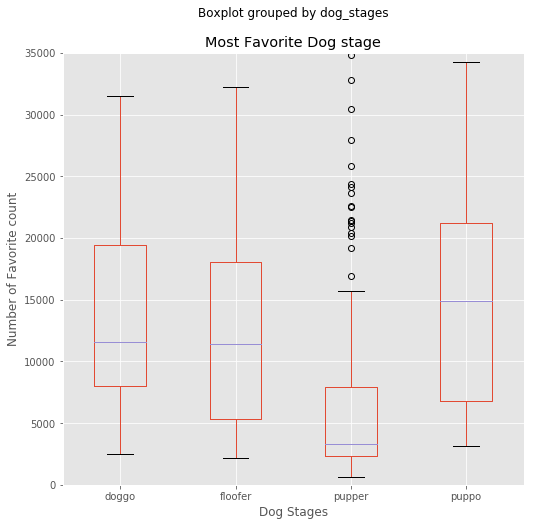

In [5]:
# Box plot for the Dog stages and favorite counts
df.boxplot( column='favorite_count', by='dog_stages', figsize = (8,8))
plt.ylim(0, 35000) # Setting y limit
plt.xlabel('Dog Stages') # Setting x label
plt.ylabel('Number of Favorite count')  # Setting y label
plt.title('Most Favorite Dog stage') # Setting Title of plot;

Hence the most favorit dog stage is puppo. No doubt its a cute stage and this expalins taht why people like this stage most

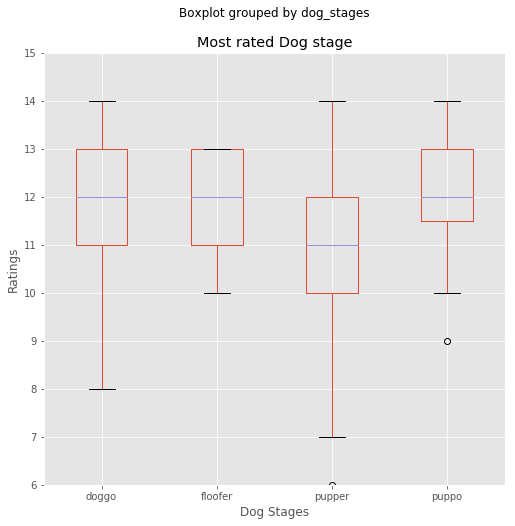

In [7]:
# Box plot for the rating and stages
df.boxplot( column='rating_numerator', by='dog_stages', figsize = (8,8))
plt.ylim(6, 15) # Setting y limit
plt.xlabel('Dog Stages') # Setting x label
plt.ylabel('Ratings')  # Setting y label
plt.title('Most rated Dog stage'); # Setting Title of plot;

Here we can clearly infer trhat pupper stage is not liked very much and thats why it has received low ratings.
on the contrary mean ratings for the remaining three stages taht is doggo,floofer,and puppo is same.

In [8]:
# Statistical sumamry of the dataframe
df.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator,p1_conf
count,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000
mean,2829.422444,9159.935442,12.121317,10.459705,0.596992
std,5286.669749,13798.251014,38.579401,6.806740,0.271726
min,12.000000,80.000000,0.000000,2.000000,0.044333
25%,630.500000,2072.250000,10.000000,10.000000,0.367913
50%,1343.000000,4107.500000,11.000000,10.000000,0.596458
75%,3124.500000,11150.250000,12.000000,10.000000,0.846986
max,84358.000000,165066.000000,1776.000000,170.000000,1.000000


This is the statistical description of teh data.We are interested in mainly the mean, and maximum and minimum of the retweet,favorite,and rating column

In [9]:
# lets explore the dog with the highest rating
df[df.rating_numerator == 1776].jpg_url

861    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [10]:
df[df.rating_numerator == 1776]

,tweet_id,retweet_count,favorite_count,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,date,time,jpg_url,p1,p1_conf,p1_dog
861,749981277374128128,2656,5429,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,2016-07-04,2018-10-29 15:00:45,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,False


so the dog named **Atticus** is the one with highest rating and its posted on 4rth of the July.
This day is celebrated as the Independence day of the United States.
And It was declared in the year 1776, hence the rating was 1776.
Thoughtful :)

In [11]:
# lets explore the dog with the lowest rating
df[df.rating_numerator == 0].jpg_url

269    https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg
896    https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg
Name: jpg_url, dtype: object

In [12]:
df[df.rating_numerator == 0]

,tweet_id,retweet_count,favorite_count,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,date,time,jpg_url,p1,p1_conf,p1_dog
269,835152434251116546,3272,23736,IPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,NaN,2017-02-24,2018-10-29 15:40:31,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,swing,0.967066,False
896,746906459439529985,321,3054,IPhone,"PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,NaN,NaN,2016-06-26,2018-10-29 03:22:31,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,traffic_light,0.470708,False


So one of them is not even a dog picture.But the other picture is a cute dog. I can't digest why it has been given low ratings lets explore it further.


In [13]:
# lets explore the original tweet
df[df.tweet_id == '835152434251116546'].expanded_urls

269    https://twitter.com/dog_rates/status/835152434...
Name: expanded_urls, dtype: object

So the matter has been solved. the low ratings are not given to the dog himself. Rather it is in response of the Plagiarism opted by other site.
 well done job!

In [14]:
# Lets Explore the five most common names given to the dog
df.name.value_counts().head() # most common 5 name

Cooper     13
Oliver     12
Charlie    11
Lucy       11
Penny       9
Name: name, dtype: int64

So the most common name is Cooper.
Close ones are Oliver, Lucy,Charlie and Tucker

In [15]:
# Lets explore what is the maximum number a tweet was retweeted.
df.retweet_count.max() 

84358

Thats a pretty high number of the retweet count.

In [16]:
df.source.value_counts() # most used medium to upload the tweet

IPhone       2266
Laptop         29
TweetDeck      13
Name: source, dtype: int64

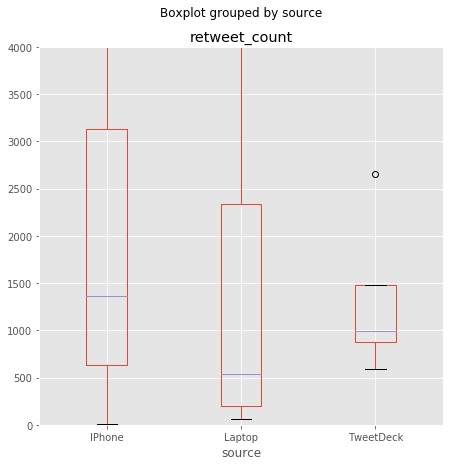

In [17]:
# Viasually see the results
df.boxplot( column='retweet_count', by='source', figsize = (7,7))
plt.ylim(0,4000);

So the Phone is used almost always to tweet
laptop and twiiter dashboard are not commonly used.

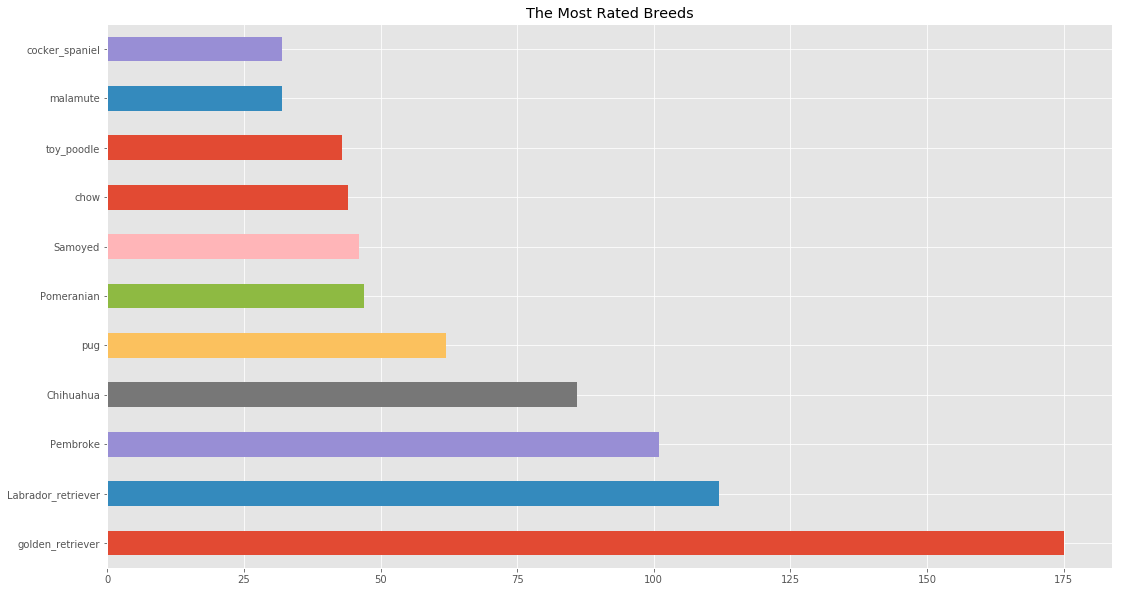

In [18]:
# Most Rated Breeds
a = df.groupby('p1').filter(lambda x: len(x) >= 30)
a['p1'].value_counts().plot(kind = 'barh',figsize = (18,10))
plt.title('The Most Rated Breeds');

So The Most common breed is Golden Retriever
Secong Highest rated is Labrador retriever

In [20]:
# Msot common month of tweet
df.date.dt.month.value_counts().sort_values()

8      65
10     73
9      75
4     112
5     120
6     148
7     170
3     186
2     210
1     291
11    364
12    494
Name: date, dtype: int64

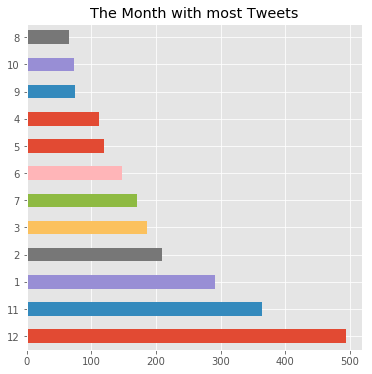

In [34]:
# Plotting a bar graph for month and Number of tweets
df.date.dt.month.value_counts().plot(kind = 'barh',figsize = (6,6))
plt.title('The Month with most Tweets');

So the most common month to tweet is December and then is November and January.
This is understandable as these months are holidays and free months usually.
and least tweets were posted on the August.

In [21]:
# To see the relation between the ratings, afvorite count and retweet counts
df[['favorite_count', 'rating_numerator', 'retweet_count']].corr(method='pearson')

,favorite_count,rating_numerator,retweet_count
favorite_count,1.000000,0.016324,0.935072
rating_numerator,0.016324,1.000000,0.017358
retweet_count,0.935072,0.017358,1.000000


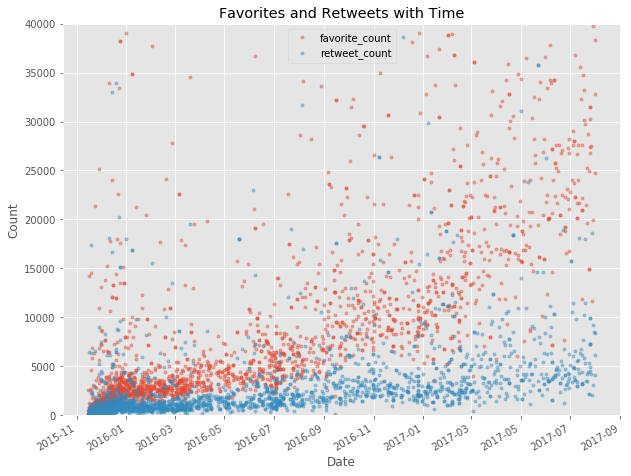

In [22]:
# Scatter plot to see a correlation between the Favorite tweets and the Retweets over a period of time
df.set_index('date', inplace=True)
df[['favorite_count', 'retweet_count']].plot(ylim=[0,40000], style = '.', alpha = 0.4, figsize =(10,8))
plt.title('Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');


This scatter plot shows that the retweet count and the favorite count have positive relation and they both increase with the passage of the time.
over the time, their variability have been increased.and they have become more Diverse

Source:

https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib

https://twitter.com/dog_rates/status/835152434251116546

https://en.wikipedia.org/wiki/Independence_Day_(United_States)